Sukyung Seo(ss13969) - HW 2 

* I tested this code in Google Colab because Jupyter Hub often collapsed and didn't save my code frequently.

Problem 1

In [ ]:
#1-1 
import random
import numpy as np

#make training set 
x1 = [random.randint(0,30) for i in range(10)]
x2 =  [random.randint(0,30) for i in range(10)]
label =[]

for i in range(10):
  if x1[i] > x2[i] :
    label.append(1)
  else:
     label.append(-1)

In [ ]:
#make test set
tx1 = [random.randint(0,5000) for i in range(5000)]
tx2 =  [random.randint(0,5000) for i in range(5000)]
tlabel =[]
for i in range(5000):
  if tx1[i] > tx2[i] :
    tlabel.append(1)
  else:
    tlabel.append(-1)

In [ ]:
train=np.array(list(zip(x1, x2)))
test =np.array(list(zip(tx1, tx2)))

In [ ]:
### Reference : https://maviccprp.github.io/a-perceptron-in-just-a-few-lines-of-python-code/
def perceptron_sgd(X, Y):
    weight = np.zeros(len(X[0]))
    eta = 1
    epochs = 20

    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], weight)*Y[i]) <= 0:
                weight = weight + eta*X[i]*Y[i]

    return weight

weight = perceptron_sgd(train, label)

In [ ]:
weight

array([ 17., -18.])

In [ ]:
####1-2
## Reference : https://maviccprp.github.io/a-support-vector-machine-in-just-a-few-lines-of-python-code/
def hinge_perceptron(X, Y):

    weight_h = np.zeros(len(X[0]))
    eta = 1
    epochs = 20


    for epoch in range(1,epochs):
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], weight_h)) < 1:
                weight_h = weight_h + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* weight_h) )
            else:
                weight_h = weight_h + eta * (-2  *(1/epoch)* weight_h)

    return weight_h

In [ ]:
weight2 = hinge_perceptron(train, label)

In [ ]:
print(weight2)

[ 3.73853585 -5.23128402]


In [ ]:
pred_t = []
for i in test:
  mid = np.dot(weight, i)
  pred_t.append(np.sign(mid))
    
cnt = 0
for i in range(5000) :
  if pred_t[i] == tlabel[i] :
    cnt = cnt+1 

In [ ]:
hinge_pred_t = []
for i in test:
  mid = np.dot(weight2, i)
  hinge_pred_t.append(np.sign(mid))

cnt_h = 0
for i in range(5000) :
  if hinge_pred_t[i] == tlabel[i] :
    cnt_h = cnt_h+1 

In [ ]:
acc = cnt/5000
acc_h = cnt_h/5000

In [ ]:
print(acc) 
print(acc_h)

0.969
0.862


#1-3
1-1 case shows much better performance in terms of accuracy. 
Because SVM use a kernel function which makes sample points to high dimention space to make them linearly separable. However, in this case, it is linearly separable without hinge loss. So, perceptron algorithm which already assumes that points are linearly seaparble works well.  

#1-4
SVM hinge loss will not change significantly. Becayse perceptron is an online algorithm that it can processes the data points one by one. However, SVM needs all training data and then it can build the classifier. 

###2

Using tanh activation with different values of standard deviation


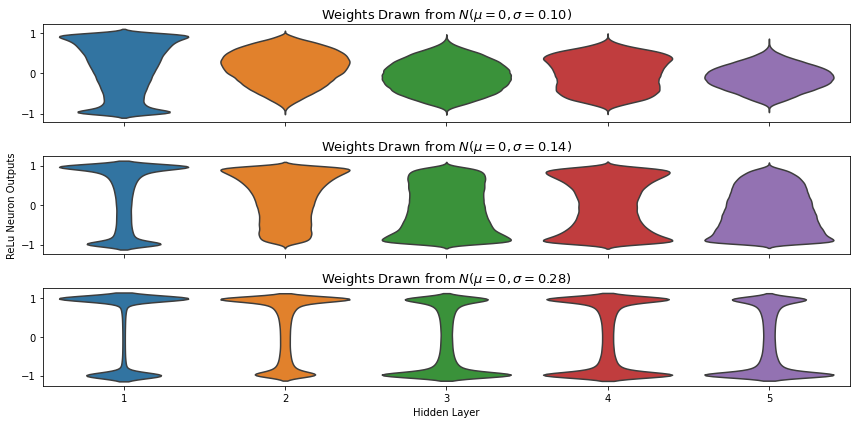

In [ ]:
#2-1
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault
from keras import utils as np_utils

def grid_axes_it(n_plots, n_cols=3, enumerate=False, fig=None):
    """
    Iterate through Axes objects on a grid with n_cols columns and as many
    rows as needed to accommodate n_plots many plots.
    Args:
        n_plots: Number of plots to plot onto figure.
        n_cols: Number of columns to divide the figure into.
        fig: Optional figure reference.
    Yields:
        n_plots many Axes objects on a grid.
    """
    n_rows = n_plots / n_cols + int(n_plots % n_cols > 0)

    if not fig:
        default_figsize = rcParamsDefault['figure.figsize']
        fig = plt.figure(figsize=(
            default_figsize[0] * n_cols,
            default_figsize[1] * n_rows
        ))

    for i in range(1, n_plots + 1):
        ax = plt.subplot(n_rows, n_cols, i)
        yield ax


def create_mlp_model(
    n_hidden_layers,
    dim_layer,
    input_shape,
    n_classes,
    kernel_initializer,
    bias_initializer,
    activation,
):
    """Create Multi-Layer Perceptron with given parameters."""
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def create_cnn_model(input_shape, num_classes, kernel_initializer='glorot_uniform',
                     bias_initializer='zeros'):
    """Create CNN model similar to
       https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py."""
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(Conv2D(64, (3, 3), activation='relu',
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def compile_model(model):
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.RMSprop(),
                  metrics=['accuracy'])
    return model


def get_init_id(init):
    """
    Returns string ID summarizing initialization scheme and its parameters.
    Args:
        init: Instance of some initializer from keras.initializers.
    """
    try:
        init_name = str(init).split('.')[2].split(' ')[0]
    except:
        init_name = str(init).split(' ')[0].replace('.', '_')

    param_list = []
    config = init.get_config()
    for k, v in config.items():
        if k == 'seed':
            continue
        param_list.append('{k}-{v}'.format(k=k, v=v))
    init_params = '__'.join(param_list)

    return '|'.join([init_name, init_params])


def get_activations(model, x, mode=0.0):
    """Extract activations with given model and input vector x."""
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts= activations(x)
    return output_elts


class LossHistory(keras.callbacks.Callback):
    """A custom keras callback for recording losses during network training."""

    def on_train_begin(self, logs={}):
        self.losses = []
        self.epoch_losses = []
        self.epoch_val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs={}):
        self.epoch_losses.append(logs.get('loss'))
        self.epoch_val_losses.append(logs.get('val_loss'))

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist



seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_test]
x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'tanh'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model,x_train)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("ReLu Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")
print("Using tanh activation with different values of standard deviation")
plt.tight_layout()
plt.show()


Using sigmoid activation with different values of standard deviation


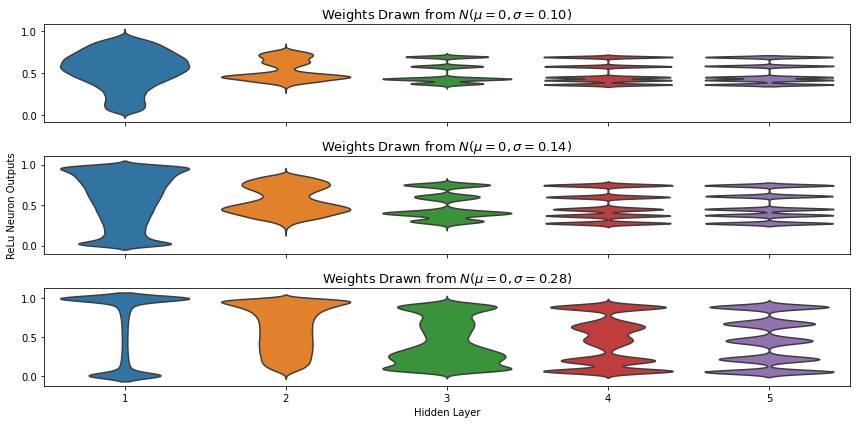

In [ ]:
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'sigmoid'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model,x_train)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("ReLu Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")
print("Using sigmoid activation with different values of standard deviation")
plt.tight_layout()
plt.show()

Using Xavier with sigmoid activation


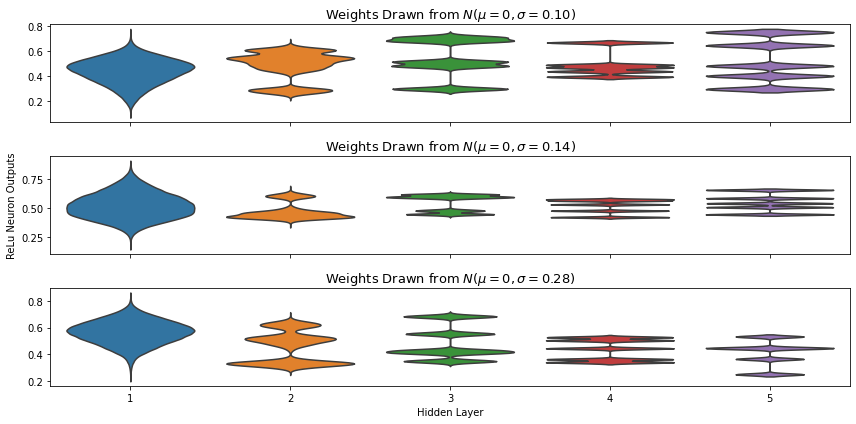

In [ ]:
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=None)
    activation = 'sigmoid'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model,x_train)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("ReLu Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")
print("Using Xavier with sigmoid activation")
plt.tight_layout()
plt.show()

Using Xavier with relu activation


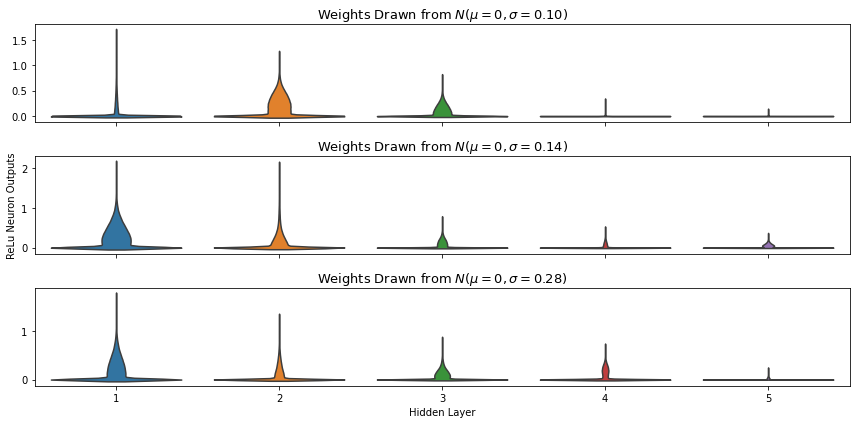

In [ ]:
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=None)
    activation = 'relu'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model,x_train)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("ReLu Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")
print("Using Xavier with relu activation")
plt.tight_layout()
plt.show()

Using Xavier with tanh activation


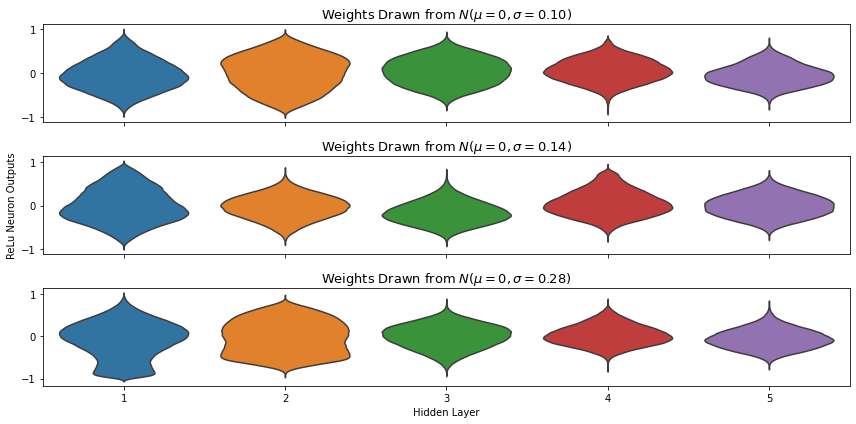

In [ ]:
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=None)
    activation = 'tanh'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model,x_train)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("ReLu Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")
print("Using Xavier with tanh activation")
plt.tight_layout()
plt.show()

Using He with relu activation


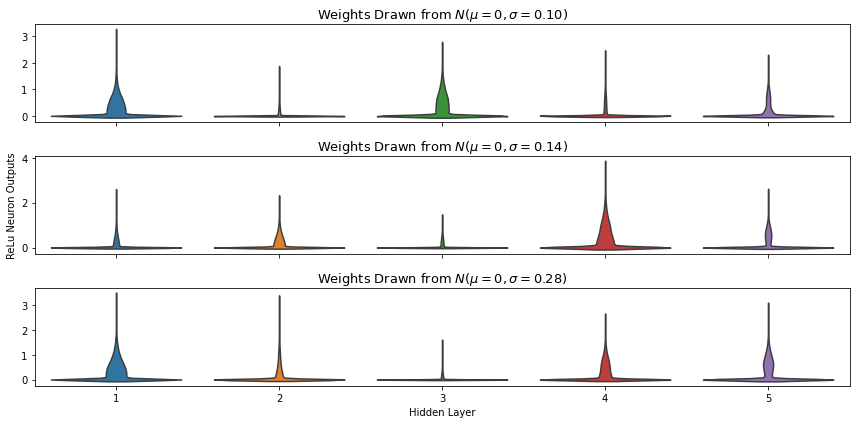

In [ ]:
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.HeNormal(seed=None)
    activation = 'relu'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model,x_train)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("ReLu Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")
print("Using He with relu activation")
plt.tight_layout()
plt.show()

2-1 vanishing gradients show sigmoid or tanh activation with different deviations. In some cases, dwindle, explode, retains according to their deviation. In Xavier and He initialization, it depends on which activation function is used. If Glorot+Tanh, vanishing gradients don't happen but other case such as relu and sigmod, vanishing gradients happen. He+Relu is okay but sigmoid and tahn case, vanishing gradients happen.

2-2

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

x = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
y = abs(x)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.20, random_state=1)

In [ ]:
model = Sequential()
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))
model.add(Dense(2, activation = 'relu',kernel_initializer='HeNormal'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
all_res = []
for i in range(1000):
  res = model.fit(train_x, train_y, batch_size = 64, validation_data=(test_x, test_y))
  all_res.append(res.history["loss"][0])

38/38 [==============================] - 0s 4ms/step - loss: 2.3657 - val_loss: 2.2392


Almost 90%, collapse

2-3

In [ ]:
from tensorflow.keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.05))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
all_res_leaky = []
for i in range(1000):
  res = model.fit(train_x, train_y, batch_size = 64, validation_data=(test_x, test_y))
  all_res_leaky.append(res.history["loss"][0])

38/38 [==============================] - 0s 4ms/step - loss: 4.1445e-08 - val_loss: 2.2678e-07


Yes, unlike normal ReLU, leaky ReLu helps preventing dying neurons. 

##Problem 3

3-1 
Co-adaptation is batchnorm is the non-stationarity of unit activity during training that which requires downstream units to adapt to a non-stantionary input distribution. 

Due to the change network parameters during the change, Internal covariate shift happens as the change in the distribution of network activation.

Co-adaptation = internal covariance-shift (which slows learning)

3-2

In [25]:
from tensorflow.keras import datasets, layers, models, losses
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.layers import Conv2D,AveragePooling2D
from keras.layers import MaxPooling2D, Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.models import Sequential

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_val, y_val = X_train[55000:, ..., np.newaxis], y_train[55000:]
X_train, y_train = X_train[:55000, ..., np.newaxis], y_train[:55000]
X_test =  X_test[..., np.newaxis]

X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_train, X_val, X_test = X_train/float(255), X_val/float(255), X_test/float(255)
X_train -= np.mean(X_train)
X_val -= np.mean(X_val)
X_test -= np.mean(X_test)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
# C1: (None,32,32,1) -> (None,28,28,6).
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))
# P1: (None,28,28,6) -> (None,14,14,6).
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# C2: (None,14,14,6) -> (None,10,10,16).
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# P2: (None,10,10,16) -> (None,5,5,16)
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# Flatten: (None,5,5,16) -> (None, 400).
model.add(Flatten())
# FC1: (None, 400) -> (None,120).
model.add(Dense(120, activation='tanh'))
# FC2: (None,120) -> (None,84).
model.add(Dense(84, activation='tanh'))
# FC3: (None,84) -> (None,10).
model.add(Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.6081 - accuracy: 0.8328 - val_loss: 0.2500 - val_accuracy: 0.9312
Epoch 2/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2704 - accuracy: 0.9216 - val_loss: 0.1766 - val_accuracy: 0.9512
Epoch 3/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2023 - accuracy: 0.9396 - val_loss: 0.1381 - val_accuracy: 0.9618
Epoch 4/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.1589 - accuracy: 0.9534 - val_loss: 0.1098 - val_accuracy: 0.9698
Epoch 5/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.1302 - accuracy: 0.9618 - val_loss: 0.0929 - val_accuracy: 0.9742
Epoch 6/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.1095 - accuracy: 0.9685 - val_loss: 0.0816 - val_accuracy: 0.9778
Epoch 7/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.0946 - accuracy: 0.9731 - val_loss: 0.0737 -

In [ ]:
history_test = model.evaluate(X_test, y_test, verbose =0)

In [ ]:
from statistics import mean
print(mean(history.history['accuracy']))
print(history_test)

0.9671472668647766
[0.028749393299221992, 0.9897000193595886]


In [ ]:
##Apply batch norm parameter 

lenet_5_model = Sequential()
lenet_5_model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(Flatten())
lenet_5_model.add(Dense(120, activation='tanh'))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(Dense(84, activation='tanh'))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(Dense(10, activation='softmax'))
lenet_5_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 


lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
batch_history_train= lenet_5_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
1719/1719 [==============================] - 51s 29ms/step - loss: 0.1884 - accuracy: 0.9422 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 2/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 0.0562 - val_accuracy: 0.9850
Epoch 3/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0627 - accuracy: 0.9799 - val_loss: 0.0573 - val_accuracy: 0.9856
Epoch 4/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0611 - val_accuracy: 0.9826
Epoch 5/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0484 - val_accuracy: 0.9874
Epoch 6/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0480 - val_accuracy: 0.9868
Epoch 7/20
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0691 -

In [ ]:
batch_history_test = lenet_5_model.evaluate(X_test, y_test, verbose =0)

In [ ]:
print(mean(batch_history_train.history['accuracy']))
print(batch_history_test)

0.9875445455312729
[0.04233098775148392, 0.9869999885559082]


batch norm learns parameter gamma and beta

3-3

In [ ]:
lenet_5_batch_model = Sequential()
lenet_5_batch_model.add(BatchNormalization())
lenet_5_batch_model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))
lenet_5_batch_model.add(BatchNormalization())
lenet_5_batch_model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_batch_model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
lenet_5_batch_model.add(BatchNormalization())
lenet_5_batch_model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_batch_model.add(Flatten())
lenet_5_batch_model.add(BatchNormalization())
lenet_5_batch_model.add(Dense(120, activation='tanh'))
lenet_5_batch_model.add(Dense(84, activation='tanh'))
lenet_5_batch_model.add(BatchNormalization())
lenet_5_batch_model.add(Dense(10, activation='softmax'))
lenet_5_batch_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

lenet_5_batch_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
batch_input_history_train= lenet_5_batch_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
1719/1719 [==============================] - 67s 38ms/step - loss: 0.1662 - accuracy: 0.9497 - val_loss: 0.0533 - val_accuracy: 0.9852
Epoch 2/20
1719/1719 [==============================] - 66s 38ms/step - loss: 0.0734 - accuracy: 0.9775 - val_loss: 0.0663 - val_accuracy: 0.9822
Epoch 3/20
1719/1719 [==============================] - 67s 39ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0452 - val_accuracy: 0.9884
Epoch 4/20
1719/1719 [==============================] - 67s 39ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0396 - val_accuracy: 0.9918
Epoch 5/20
1719/1719 [==============================] - 64s 37ms/step - loss: 0.0433 - accuracy: 0.9860 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch 6/20
1719/1719 [==============================] - 63s 37ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0470 - val_accuracy: 0.9886
Epoch 7/20
1719/1719 [==============================] - 61s 36ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0444 -

In [ ]:
lenet_5_batch_model.call = tf.function(lenet_5_batch_model.call)

In [ ]:
batch_input_history_test = lenet_5_batch_model.evaluate(X_test, y_test, verbose =0)

In [ ]:
batch_input_history_test

[0.03194252774119377, 0.9905999898910522]

In [ ]:
import seaborn as sns
layer0 = [lenet_5_batch_model.layers[0].get_weights()]

In [ ]:
layer0 = np.asarray(layer0[0])

Layer0


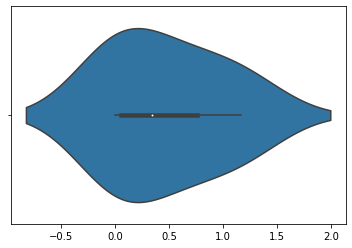

In [ ]:
print("Layer0")
sns.violinplot(x=layer0)


Layer2


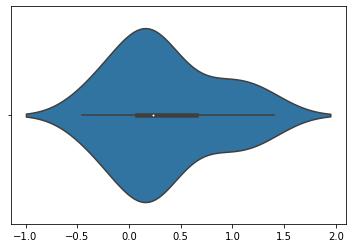

In [ ]:
layer2 = [lenet_5_batch_model.layers[2].get_weights()]
layer2 = np.asarray(layer2[0])
print("Layer2")
sns.violinplot(x=layer2)


Layer5


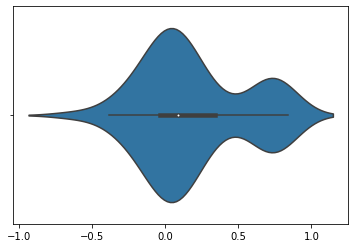

In [ ]:
layer5 = [lenet_5_batch_model.layers[5].get_weights()]
layer5 = np.asarray(layer5[0])
print("Layer5")
sns.violinplot(x=layer5)

In [ ]:
from statistics import mean

print(mean(batch_input_history_train.history['accuracy']))
print(batch_input_history_test)

0.9876581877470016
[0.036371391266584396, 0.9890999794006348]


Yes, batch normalization for input layer improves performance. (accuracy 0.98-->0.99)

3-4

In [ ]:
lenet_5_dropout = Sequential()
lenet_5_dropout.add(Dropout(0.2))
lenet_5_dropout.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))
lenet_5_dropout.add(Dropout(0.5))
lenet_5_dropout.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_dropout.add(Dropout(0.5))
lenet_5_dropout.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
lenet_5_dropout.add(Dropout(0.5))
lenet_5_dropout.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_dropout.add(Dropout(0.5))
lenet_5_dropout.add(Flatten())
lenet_5_dropout.add(Dense(120, activation='tanh'))
lenet_5_dropout.add(Dropout(0.5))
lenet_5_dropout.add(Dense(84, activation='tanh'))
lenet_5_dropout.add(Dropout(0.5))
lenet_5_dropout.add(Dense(10, activation='softmax'))
lenet_5_dropout.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [ ]:
dropout_history_train= lenet_5_dropout.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
54976/55000 [============================>.] - ETA: 0s - loss: 1.4965 - acc: 0.4748

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 30s 550us/sample - loss: 1.4963 - acc: 0.4749 - val_loss: 0.4208 - val_acc: 0.8854
Epoch 2/20
55000/55000 [==============================] - 30s 551us/sample - loss: 0.9084 - acc: 0.6971 - val_loss: 0.3261 - val_acc: 0.9072
Epoch 3/20
55000/55000 [==============================] - 30s 548us/sample - loss: 0.8102 - acc: 0.7361 - val_loss: 0.2874 - val_acc: 0.9174
Epoch 4/20
55000/55000 [==============================] - 30s 551us/sample - loss: 0.7505 - acc: 0.7583 - val_loss: 0.2679 - val_acc: 0.9224
Epoch 5/20
55000/55000 [==============================] - 30s 548us/sample - loss: 0.7084 - acc: 0.7735 - val_loss: 0.2488 - val_acc: 0.9268
Epoch 6/20
55000/55000 [==============================] - 30s 549us/sample - loss: 0.6748 - acc: 0.7847 - val_loss: 0.2329 - val_acc: 0.9318
Epoch 7/20
55000/55000 [==============================] - 30s 550us/sample - loss: 0.6468 - acc: 0.7947 - val_loss: 0.2205 - val_acc: 0.9346
Epoch 8/20
55000/55000 [

In [ ]:
dropout_history_test = lenet_5_dropout.evaluate(X_test, y_test, verbose =0)

In [ ]:
print(mean(dropout_history_train.history['acc']))
print(dropout_history_test)

0.7899691
[0.19941676950454712, 0.9399]


3-5

In [ ]:
lenet_5_both = Sequential()
lenet_5_both.add(Dropout(0.2))
lenet_5_both.add(BatchNormalization())
lenet_5_both.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))
lenet_5_both.add(Dropout(0.5))
lenet_5_both.add(BatchNormalization())
lenet_5_both.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_both.add(Dropout(0.5))
lenet_5_both.add(BatchNormalization())
lenet_5_both.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
lenet_5_both.add(Dropout(0.5))
lenet_5_both.add(BatchNormalization())
lenet_5_both.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet_5_both.add(Dropout(0.5))
lenet_5_both.add(BatchNormalization())
lenet_5_both.add(Flatten())
lenet_5_both.add(Dense(120, activation='tanh'))
lenet_5_both.add(Dropout(0.5))
lenet_5_both.add(BatchNormalization())
lenet_5_both.add(Dense(84, activation='tanh'))
lenet_5_both.add(Dropout(0.5))
lenet_5_both.add(BatchNormalization())
lenet_5_both.add(Dense(10, activation='softmax'))
lenet_5_both.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [ ]:
both_history_train= lenet_5_both.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
54944/55000 [============================>.] - ETA: 0s - loss: 1.3863 - acc: 0.5284

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 48s 870us/sample - loss: 1.3859 - acc: 0.5286 - val_loss: 0.3508 - val_acc: 0.9060
Epoch 2/20
55000/55000 [==============================] - 47s 855us/sample - loss: 0.8693 - acc: 0.7114 - val_loss: 0.2806 - val_acc: 0.9218
Epoch 3/20
55000/55000 [==============================] - 47s 853us/sample - loss: 0.7565 - acc: 0.7503 - val_loss: 0.2423 - val_acc: 0.9330
Epoch 4/20
55000/55000 [==============================] - 47s 858us/sample - loss: 0.7030 - acc: 0.7711 - val_loss: 0.2126 - val_acc: 0.9390
Epoch 5/20
55000/55000 [==============================] - 47s 857us/sample - loss: 0.6529 - acc: 0.7894 - val_loss: 0.2000 - val_acc: 0.9432
Epoch 6/20
55000/55000 [==============================] - 47s 862us/sample - loss: 0.6215 - acc: 0.8005 - val_loss: 0.1801 - val_acc: 0.9480
Epoch 7/20
55000/55000 [==============================] - 47s 857us/sample - loss: 0.5881 - acc: 0.8133 - val_loss: 0.1656 - val_acc: 0.9518
Epoch 8/20
55000/55000 [

In [ ]:
both_history_test = lenet_5_both.evaluate(X_test, y_test, verbose =0)

In [ ]:
print(mean(both_history_train.history['acc']))
print(both_history_test)

0.8076491
[0.15066289876699449, 0.9547]


3-5

Performance is better than when dropout is used only, but is worse than batch normalization is used alone.
According to https://www.google.com/search?q=batch+normalization+and+drop+out+together&oq=batch+normalization+and+drop+out+together&aqs=chrome..69i57j0i13.8203j0j7&sourceid=chrome&ie=UTF-8. using batch normalization only is recommended. It is because BN may not speed up convergence but improves generalization power(test accuracy) 

##Problem 4

4-1

In [14]:
import random
from math import *
import pandas as pd
import numpy as np

In [15]:
x1 = np.random.uniform(-512,512,100000)
x2 = np.random.uniform(-512,512,100000)

mu, sigma = 0, 0.3
s = np.random.normal(mu, sigma, 100000)

In [16]:
def outfunc(x1, x2) :
  value = -(x2+47)*sin(sqrt(abs(x1/2+(x2+47))))-x1*sin(sqrt(abs(x1-(x2+47))))
  return value

In [17]:
X = pd.DataFrame({'x1':x1, 'x2':x2})

In [18]:
y =[]
for i in range(100000) :
  mid = outfunc(X['x1'][i],X['x2'][i])+s[i]
  y.append(mid)

In [19]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.20, random_state=1)
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

In [24]:
from tensorflow.keras import datasets, layers, models, losses
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.layers import Conv2D,AveragePooling2D
from keras.layers import MaxPooling2D, Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras import optimizers
from keras.losses import mean_squared_error
from keras import backend as K
import time

In [ ]:
## 1 hidden layer neural network 


unit1 = [16, 32, 64, 128, 256, 512]
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
unit1_res =[]
unit1_param =[]
unit1_time=[]

for i in range(6):
  model_1 = Sequential()
  model_1.add(Dense(unit1[i],activation='relu', input_dim=2))
  model_1.add(Dense(units = 1,  activation='relu'))

  model_1.compile(loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()], optimizer=sgd)

  t0 = time.time()
  history = model_1.fit(train_x, train_y, batch_size =1000, epochs = 2000, validation_data = (test_x, test_y) )
  unit1_time.append(time.time() - t0 )

  unit1_param.append(model_1.count_params())
  unit1_res.append(history.history['val_root_mean_squared_error'])

In [ ]:
# 2 hidden layers
unit2_1 = [16, 32, 16, 32, 32]
unit2_2 = [32, 64, 64, 128, 256]
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
unit2_res =[]
unit2_param =[]
unit2_time=[]
unit2_all = [48, 96, 80, 160, 288]
for i in range(5):  
  model_2 = Sequential()
  model_2.add(Dense(unit2_1[i],activation='relu', input_dim=2))
  model_2.add(BatchNormalization())
  model_2.add(Dense(unit2_2[i],  activation='relu'))
  model_2.add(BatchNormalization())
  model_2.add(Dense(1,  activation='relu'))

  model_2.compile(loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()], optimizer=sgd)
  t0 = time.time()
  history = model_2.fit(train_x, train_y, batch_size =1000, epochs = 2000, validation_data = (test_x, test_y) )
  unit2_time.append(time.time() - t0)
  unit2_param.append(model_2.count_params())
  unit2_res.append(history.history['val_root_mean_squared_error'])

80/80 [==============================] - 2s 23ms/step - loss: 88849.8359 - root_mean_squared_error: 298.0769 - val_loss: 89877.1406 - val_root_mean_squared_error: 299.7952
Epoch 922/2000
80/80 [==============================] - 2s 24ms/step - loss: 88850.6016 - root_mean_squared_error: 298.0782 - val_loss: 89872.0547 - val_root_mean_squared_error: 299.7867
Epoch 923/2000
80/80 [==============================] - 2s 24ms/step - loss: 88851.1328 - root_mean_squared_error: 298.0791 - val_loss: 89876.2109 - val_root_mean_squared_error: 299.7936
Epoch 924/2000
80/80 [==============================] - 2s 25ms/step - loss: 88850.9219 - root_mean_squared_error: 298.0787 - val_loss: 89873.0312 - val_root_mean_squared_error: 299.7883
Epoch 925/2000
24/80 [========>.....................] - ETA: 1s - loss: 88770.0391 - root_mean_squared_error: 297.9431

In [4]:
unit3_1 = [16, 32, 64, 32, 16]
unit3_2 = [16, 32, 64, 64, 32]
unit3_3 = [16, 32, 64, 256, 128]

In [10]:
from operator import add
unit3_all= list( map(add, unit3_1, unit3_2) )
unit3_all= list( map(add, unit3_all, unit3_3) )

In [8]:
unit3_all

[48, 96, 192, 352, 176]

In [ ]:
# 3 hidden layers
unit3_1 = [16, 32, 64, 32, 16]
unit3_2 = [16, 32, 64, 64, 32]
unit3_3 = [16, 32, 64, 256, 128]
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
unit3_all = [48, 96, 192, 352, 176]
unit3_res =[]
unit3_param =[]
unit3_time=[]

for i in range(5):
  model_3 = Sequential()
  model_3.add(Dense(unit3_1[i],activation='relu', input_dim=2))
  model_3.add(BatchNormalization())
  model_3.add(Dense(unit3_2[i],  activation='relu'))
  model_3.add(BatchNormalization())
  model_3.add(Dense(unit3_3[i],  activation='relu'))
  model_3.add(BatchNormalization())
  model_3.add(Dense(1,  activation='relu'))

  model_3.compile(loss='mse',metrics=[tf.keras.metrics.RootMeanSquaredError()], optimizer=sgd)
  t0 = time.time()
  history = model_3.fit(train_x, train_y, batch_size =1000, epochs = 2000, validation_data = (test_x, test_y) )
  unit3_time.append(time.time() - t0)

  unit3_param.append(model_3.count_params())
  unit3_res.append(history.history['val_root_mean_squared_error'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
80/80 [==============================] - 0s 5ms/step - loss: 89194.8203 - root_mean_squared_error: 298.6550 - val_loss: 88570.2422 - val_root_mean_squared_error: 297.6075
Epoch 1033/2000
80/80 [==============================] - 0s 5ms/step - loss: 89194.8125 - root_mean_squared_error: 298.6550 - val_loss: 88570.2422 - val_root_mean_squared_error: 297.6075
Epoch 1034/2000
80/80 [==============================] - 1s 6ms/step - loss: 89194.8203 - root_mean_squared_error: 298.6550 - val_loss: 88570.2422 - val_root_mean_squared_error: 297.6075
Epoch 1035/2000
80/80 [==============================] - 0s 5ms/step - loss: 89194.7734 - root_mean_squared_error: 298.6549 - val_loss: 88570.2422 - val_root_mean_squared_error: 297.6075
Epoch 1036/2000
80/80 [==============================] - 0s 5ms/step - loss: 89194.7891 - root_mean_squared_error: 298.6550 - val_loss: 88570.2422 - val_root_mean_squared_error: 297.6075
Epoch 1037/2000
80/80 [======================

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(unit1, unit1_res, label="1 hidden layer")
plt.plot(unit2_all, unit2_res, label="2 hidden layer")
plt.plot(unit3_all, unit3_res, label="3 hidden layer")
plt.xlabel('# of layers')
plt.ylabel('RMSE')
plt.show()

In [ ]:
plt.plot(unit1_param, unit1_res, label="1 hidden layer")
plt.plot(unit2_param, unit2_res, label="2 hidden layer")
plt.plot(unit3_param, unit3_res, label="3 hidden layer")
plt.xlabel('Parameter')
plt.ylabel('RMSE')
plt.show()

4-3

In [ ]:
plt.plot(unit1_time, unit1_param, label="1 hidden layer")
plt.plot(unit2_time, unit2_param, label="2 hidden layer")
plt.plot(unit3_time, unit3_param, label="3 hidden layer")
plt.xlabel('Time')
plt.ylabel('# of Param')
plt.show()

Due to the computation time, I couldn't check it but number of parameter is closely related to training time. If there are a lot of parameters, it takes time to train. 